## **Цели и задачи исследования**
***
**Цель исследования** - *отследить влияние условий жизни учащихся в возрасте от 15 до 22 лет на их успеваемость по математике, чтобы на ранней стадии выявить студентов, находящихся в группе риска.*

*Целью исследования определяются следующие* **задачи:**

* *повести разведавательный анализ данных для определения параметров предсказательной модели,  составить отчет по его результатам;*
* *разработать модель, которая бы предсказывала результаты госэкзамена для каждого ученика.*

**В первой части** *исследования будет представлено решение 1 задачи.*



<img src="https://baigenews.kz/upload/iblock/0d1/Deti-uchatsya-v-shkole-bez-sportzala_-stolovoy-i-tualeta-v-Almaty-_-BaigeNews.kz.jpg" />



### 1. Импортирование библиотек


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import combinations
from scipy.stats import ttest_ind
%matplotlib inline
import random

### 2. Чтение файла и первичное исследование данных

In [2]:
# Опция для вывода всех строк и столбцов
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

# Чтение и вывод информации о данных
data = pd.read_csv('C:/Users/1201065/3_Module_Project/stud_math.csv')
display(data.head())
data.info()
data.describe()

# Вывод информации о количестве нулевых значений в столбцах
#data.isnull().sum()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,"studytime, granular",higher,internet,romantic,famrel,freetime,goout,health,absences,score
0,GP,F,18,U,NaN,A,4.0,4.0,at_home,teacher,course,mother,2.0,2.0,0.0,yes,no,no,no,yes,-6.0,yes,NaN,no,4.0,3.0,4.0,3.0,6.0,30.0
1,GP,F,17,U,GT3,NaN,1.0,1.0,at_home,other,course,father,1.0,2.0,0.0,no,yes,no,no,no,-6.0,yes,yes,no,5.0,3.0,3.0,3.0,4.0,30.0
2,GP,F,15,U,LE3,T,1.0,1.0,at_home,other,other,mother,1.0,2.0,3.0,yes,no,NaN,no,yes,-6.0,yes,yes,NaN,4.0,3.0,2.0,3.0,10.0,50.0
3,GP,F,15,U,GT3,T,4.0,2.0,health,NaN,home,mother,1.0,3.0,0.0,no,yes,yes,yes,yes,-9.0,yes,yes,yes,3.0,2.0,2.0,5.0,2.0,75.0
4,GP,F,16,U,GT3,T,3.0,3.0,other,other,home,father,1.0,2.0,0.0,no,yes,yes,no,yes,-6.0,yes,no,no,4.0,3.0,2.0,5.0,4.0,50.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 30 columns):
school                 395 non-null object
sex                    395 non-null object
age                    395 non-null int64
address                378 non-null object
famsize                368 non-null object
Pstatus                350 non-null object
Medu                   392 non-null float64
Fedu                   371 non-null float64
Mjob                   376 non-null object
Fjob                   359 non-null object
reason                 378 non-null object
guardian               364 non-null object
traveltime             367 non-null float64
studytime              388 non-null float64
failures               373 non-null float64
schoolsup              386 non-null object
famsup                 356 non-null object
paid                   355 non-null object
activities             381 non-null object
nursery                379 non-null object
studytime, granular    388 non-

,age,Medu,Fedu,traveltime,studytime,failures,"studytime, granular",famrel,freetime,goout,health,absences,score
count,395.000000,392.000000,371.000000,367.000000,388.000000,373.000000,388.000000,368.000000,384.000000,387.000000,380.000000,383.000000,389.000000
mean,16.696203,2.750000,2.614555,1.438692,2.038660,0.337802,-6.115979,3.937500,3.231771,3.105943,3.531579,7.279373,52.262211
std,1.276043,1.098127,2.228732,0.694181,0.842078,0.743135,2.526235,0.927277,0.993940,1.115896,1.396019,23.465197,22.919022
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,-12.000000,-1.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,16.000000,2.000000,2.000000,1.000000,1.000000,0.000000,-6.000000,4.000000,3.000000,2.000000,3.000000,0.000000,40.000000
50%,17.000000,3.000000,2.000000,1.000000,2.000000,0.000000,-6.000000,4.000000,3.000000,3.000000,4.000000,4.000000,55.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,-3.000000,5.000000,4.000000,4.000000,5.000000,8.000000,70.000000
max,22.000000,4.000000,40.000000,4.000000,4.000000,3.000000,-3.000000,5.000000,5.000000,5.000000,5.000000,385.000000,100.000000



**Результат:** *работа будет проведена над таблицей, состоящей из 395 строк, 30 столбцов, из которых 13 имеют числовой тип данных, 17 - текстовый. 27 столбцов содержат значения типа "NaN".*

### 3. Используемые для обработки данных функции

In [3]:
def description_column(x):
    
    """Функция используется для описания 
     столбца текстового типа """
    
    print('Количество уникальных значений в столбце:',x.nunique())
    print('Перечень уникальных значений:', x.unique())
    print('Длина столбца:',len(x))
    print('Количество значений "NaN":', x.isna().sum())
    print("Количество значений, встретившихся в столбце более 10 раз:", (x.value_counts()>10).sum())
    
def outliers(x): 
    
    """Функция используется для 
    определения границ выбросов"""
    
    median = x.median()
    IQR = x.quantile(0.75)-x.quantile(0.25)
    q25 = x.quantile(0.25)
    q75 = x.quantile(0.75)
    print('25-й квартиль: {},'.format(q25), '75-й квартиль: {},'.format(q75), 'IQR: {},'.format(IQR),
     "границы выбросов: [{x_min},{x_max}].".format(x_min = q25-1.5*IQR, x_max = q75+1.5*IQR))

def delete_outliers(x): 
    
    """Функция используется для 
    очистки данных от выбросов"""
    
    median = x.median()
    IQR = x.quantile(0.75)-x.quantile(0.25)
    q25 = x.quantile(0.25)
    q75 = x.quantile(0.75)
    x_min =q25-1.5*IQR
    x_max =q75+1.5*IQR
    return x_min, x_max

def boxplot(x1,y1,d,t,tx,ty):
    
    """Функция используется для 
    вывода boxplot"""
    
    sns.boxplot(x=x1, y=y1, data=d, color = 'green')
    plt.title(t)
    plt.xlabel(tx, fontsize=11, color='black')
    plt.ylabel(ty, fontsize=11, color='black')
    plt.grid(True)

    
def address(address,reason,traveltime):
    
    """Функция для замены нулевых значений в address
       Вероятность ошибки 6(R)/87(Итого)"""
    
    if pd.isnull(address)==True and (reason in "home" and (traveltime==1 or traveltime==2)):
        return 'U'
    else:
        """Вероятность ошибки 7(R)/32(Итого)"""
        if pd.isnull(address)==True and (reason in "home" and (traveltime>2 or pd.isnull(traveltime)==True)):
            return 'U'
        else:
            if pd.isnull(address)==True and (reason not in "home" and (traveltime==1 or traveltime==2)):
                return 'U'
            else:
                if pd.isnull(address)==True and (reason not in "home" and pd.isnull(traveltime)==True): 
                    return 'R'
                else:
                    return address

def traveltime(address,traveltime):
    traveltime_U = data[data['address']=='U']['traveltime'].mean()
    traveltime_R = data[data['address']=='R']['traveltime'].mean()
    
    """Функция для замены нулевых значений в traveltime"""
    
    if pd.isnull(traveltime)==True and address in "U":
        return round(traveltime_U)
    else:
        if pd.isnull(traveltime)==True and address in "R":
            return round(traveltime_R)
        else:
            return traveltime
        
def bar_groupby(x,y,t,xl,yl):
    
    """Функция используется для 
    вывода диаграммы по нескольким признакам"""
    
    data.groupby(by=[x,y])[y].count().plot(kind = 'bar', color = 'goldenrod',title = t)
    plt.xlabel(xl, fontsize=11, color='black')
    plt.ylabel(yl, fontsize=11, color='black')
    plt.grid(True)
    plt.show()
    
def bar_pivot_table(x,y,c,t,xl,yl):
    
    """Функция используется для 
    вывода диаграммы по одному признаку"""
        
    data.pivot_table(values = [x], index = [y], aggfunc = c).plot(kind = 'bar', color = 'goldenrod',title = t)
    plt.xlabel(xl, fontsize=11, color='black')
    plt.ylabel(yl, fontsize=11, color='black')
    plt.legend('')
    plt.grid(True)
    plt.show()
    
def Fedu(fedu):
    
    """Функция используется для 
    замены ошибочного значения""" 
    
    if fedu == 40:
        return 4
    else:
        return fedu

def famrel(famrel):
    
    """Функция используется для 
    замены ошибочного значения""" 
    
    if famrel == -1:
        return 1
    else:
        return famrel   
       
def dop(x):
    
    """Функция используется для 
    вывода дополнительной информации""" 
        
    display(pd.DataFrame(x.value_counts(normalize = True)*100))
    
def correlation(x,y):
    
    """Функция используется для 
    расчета коэффициента корреляции""" 
        
    display(pd.DataFrame(data[[x,y]].corr()))
    
def get_stat_dif(column):
    cols = data.loc[:, column].value_counts().index[:10]
    combinations_all = list(combinations(cols, 2))
    for comb in combinations_all:
        if ttest_ind(data.loc[data.loc[:, column] == comb[0], 'score'], 
                        data.loc[data.loc[:, column] == comb[1], 'score']).pvalue \
            <= 0.05/len(combinations_all): # Учли поправку Бонферони
            print('Найдены статистически значимые различия для колонки', column)
            break


### 4. Ознакомление со данными в столбцах таблицы

**Этапы анализа:** 
* Определить количество нулевых значений, уникальных значений, количество значений с частотой более 10 раз;
* Построить диаграмму распределения признака;
* Оценить влияние параметра на результирующих признак (на столбец "score");
* Принять решение по обработке нулевых значений. Варианты решения:
    1. заполнить, опираясь на данные из других столбцов;
    2. удалить нулевые значения;
    3. проставить среднее значение (для числовые столбцов);
    4. проставить рандомный признак (для текстовых столбцов);
    5. ничего не делать.

#### 4.1 School

Количество уникальных значений в столбце: 2
Перечень уникальных значений: ['GP' 'MS']
Длина столбца: 395
Количество значений "NaN": 0
Количество значений, встретившихся в столбце более 10 раз: 2


,school
GP,88.35443
MS,11.64557


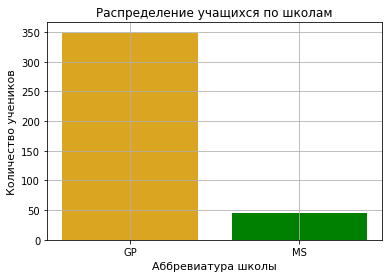

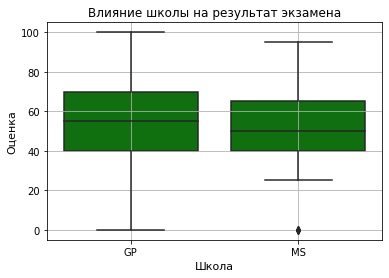

In [4]:
# Описание значений в столбце
description_column(data['school'])
dop(data['school'])

# Вывод визуализаций
school_GP = data[data['school']=='GP']['school'].count()
school_MS = data[data['school']=='MS']['school'].count()
fig, axes = plt.subplots()
axes.set(facecolor = 'white')
axes.grid(True)
axes.bar('GP', school_GP, color = 'goldenrod')
axes.bar('MS', school_MS, color = 'green')
axes.set_xlabel('Аббревиатура школы', color = 'black', size = 11)
axes.set_ylabel('Количество учеников', color = 'black', size = 11)
axes.set_title('Распределение учащихся по школам', color = 'black', size = 12)
plt.show() 
boxplot("school","score",data,"Влияние школы на результат экзамена","Школа","Оценка")


**Результат:** *столбец "school" не содержит нулевых значений, выбросов. Анализ показал, что 88% студентов учатся в GP. 
В среднем оценки в GP школе выше оценок в MS школе, однако разброс оценок в GP больше. Для MS школы получение 0 оценки - редкость.* **Корреляция с "score" не оценивалась.**


#### 4.2 Sex

Количество уникальных значений в столбце: 2
Перечень уникальных значений: ['F' 'M']
Длина столбца: 395
Количество значений "NaN": 0
Количество значений, встретившихся в столбце более 10 раз: 2


,sex
F,52.658228
M,47.341772


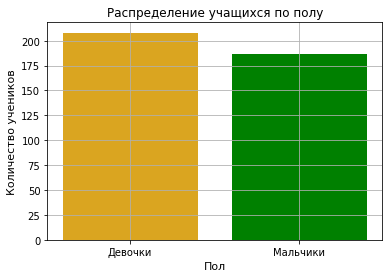

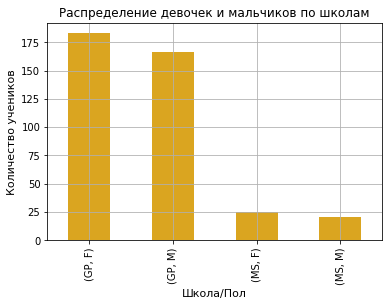

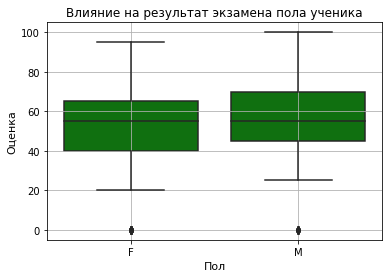

In [5]:
# Описание значений в столбце
description_column(data['sex'])
dop(data['sex'])

# Вывод визуализации
school_F= data[data['sex']=='F']['school'].count()
school_M= data[data['sex']=='M']['school'].count()
fig, axes = plt.subplots()
axes.set(facecolor = 'white')
axes.grid(True)
axes.bar('Девочки', school_F, color = 'goldenrod')
axes.bar('Мальчики', school_M, color = 'green')
axes.set_xlabel('Пол', color = 'black', size = 11)
axes.set_ylabel('Количество учеников', color = 'black', size = 11)
axes.set_title('Распределение учащихся по полу', color = 'black', size = 12)
plt.show() 

bar_groupby('school','sex','Распределение девочек и мальчиков по школам','Школа/Пол','Количество учеников')
boxplot("sex","score",data,"Влияние на результат экзамена пола ученика","Пол","Оценка")


**Результат:** *столбец "sex" не содержит нулевых значений, выбросов. Анализ показал, что в школах обучается 53% девочек и 47% мальчиков. Они распределены по школам (GP, MS) равномерно. В среднем оценки мальчиков и девочек одинаковые, однако доля мальчиков, получающих оценки выше среднего больше, чем доля девочек. На графике также заметны 0 оценки.* **Корреляция с "score" не оценивалась.**

#### 4.3 Age

Количество уникальных значений в столбце: 8
Перечень уникальных значений: [18 17 15 16 19 22 20 21]
Длина столбца: 395
Количество значений "NaN": 0
Количество значений, встретившихся в столбце более 10 раз: 5


,age
16,26.329114
17,24.810127
18,20.759494
15,20.759494
19,6.075949
20,0.759494
22,0.253165
21,0.253165


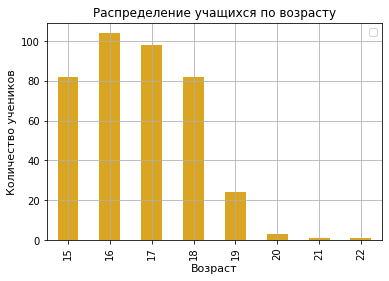

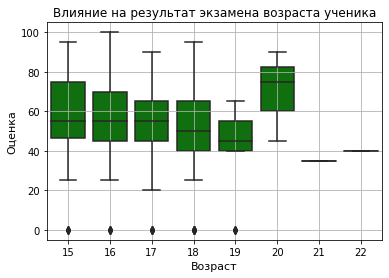

In [6]:
# Опишем данные
description_column(data['age'])
dop(data['age'])

# Посмотрим на распределение признака
bar_pivot_table('school','age','count','Распределение учащихся по возрасту','Возраст','Количество учеников')
boxplot("age","score",data,"Влияние на результат экзамена возраста ученика","Возраст","Оценка")

*По полученной диаграмме распределения можно сказать, что большинство учащихся находятся в возрасте от 16 до 17 лет. 
Средние оценки в группе студентов 15-17 лет одинаковые, однако разброс неравный. Наименьшие средние оценки у группы учащихся 18-19 лет. Высокие средние оценки получают учащиеся в возрасте 20 лет. 
**В данных есть выбросы**: ученики со возрастом **более 20 лет** с оценками ниже средних в сравнении с другими возрастными группами. Таких студентов немного (2 человека), однако они могут занизить параметры. Для принятия решения по обработке таких значений найдем границы выбросов.*
**На заметку: в условии задачи сказано, что модель строится для студентов возраста от 15 до 22 лет. Однако в таблице есть информация только о 2-х студентах 21-22 лет и 3-х студентов 20 лет, достаточно ли данных по этой возрастной группе для включения в модель (мы не сможем выявить типичные условия жизни, а именно их влияние на результат экзамена мы должны оценить)?**

25-й квартиль: 16.0, 75-й квартиль: 18.0, IQR: 2.0, границы выбросов: [13.0,21.0].


,score,age
score,1.000000,-0.171707
age,-0.171707,1.000000


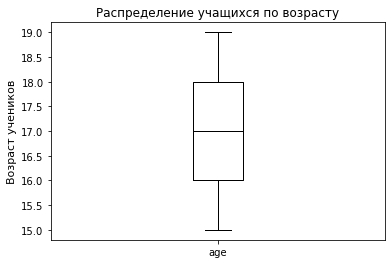

In [8]:
# Построим диаграмму с усами
data['age'].plot(kind='box', color='black',title = 'Распределение учащихся по возрасту')
plt.ylabel('Возраст учеников', fontsize=11, color='black')

# Определим границы выбросов 
outliers(data['age'])

# Очистка данных
data = data.loc[data['age'].between(delete_outliers(data['age'])[0],19)]

# Проверка очистки данных
data['age'].unique()

# Корреляция
correlation('score','age')

 **Результат:** *в столбце "age" нет нулевых значений.Согласно построенной диаграмме с усами данные **содержат выброс**: возраст учащегося 22 года, что подтверждается вычесленными границами выбросов **[13;21]**. Проведена очистка столбца "age": из анализа убраны студенты возраста 20-22 года, т.к по этой возрастной группе не достаточно информации для оценки их условий жизни (см. данные по доле).* **Корреляция возраста с "score" отрицательная и меньше 1.**


#### 4.4 Address

In [9]:
# Описание значений в столбце
description_column(data['address'])

# Замена нулевых значений на None
data['address'] = data['address'].apply(lambda x: None if pd.isnull(x) else None if x == 'nan' else x)

Количество уникальных значений в столбце: 2
Перечень уникальных значений: ['U' nan 'R']
Длина столбца: 390
Количество значений "NaN": 16
Количество значений, встретившихся в столбце более 10 раз: 2


В столбце "address" содержится **17 пустых значений**, и у нас нет оснований для их удаления. Мы знаем, что в исследуемой таблице есть столбец **"traveltime"**, возможно содержащиеся в нем данные о времени пути учащегося до школы помогут заполнить пропуски в столбце "address". Кроме того можно опираться на столбец **"reason"**, в котором содержится информация о причине выбора школы. Если причина близость к дому ("home") и время в пути равно 1-2, то учащийся, вероятней всего, живет в городе.

In [10]:
# Вспомогательная таблица для написания функции address
#data.iloc[:,3:13].query('address not in "R" and address not in "U"')

# Применение функции address
data['address']=data.apply(lambda x: address(x['address'],x['reason'],x['traveltime']), axis=1)

# Проверка нулевых значений
data['address'].isnull().sum()

0

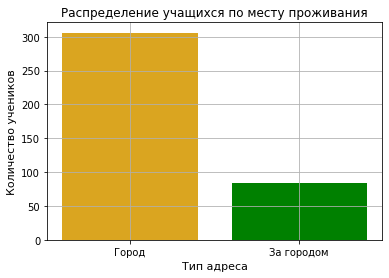

,address
U,78.461538
R,21.538462


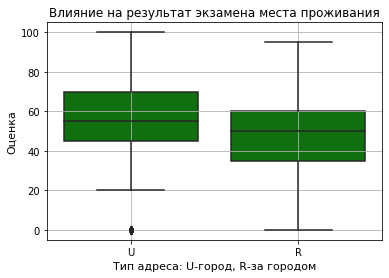

In [11]:
# Вывод визуализации
address_U = data[data['address']=='U']['school'].count()
address_R = data[data['address']=='R']['school'].count()
fig, axes = plt.subplots()
axes.set(facecolor = 'white')
axes.grid(True)
axes.bar('Город', address_U, color = 'goldenrod')
axes.bar('За городом', address_R, color = 'green')
axes.set_xlabel('Тип адреса', color = 'black', size = 11)
axes.set_ylabel('Количество учеников', color = 'black', size = 11)
axes.set_title('Распределение учащихся по месту проживания', color = 'black', size = 12)
plt.show() 
boxplot("address","score",data,"Влияние на результат экзамена места проживания","Тип адреса: U-город, R-за городом","Оценка") 

# Дополнительная информация
dop(data['address'])

**Результат:** *в столбце "address" нет нулевых значений и нет выбросов (была осуществлена обработка путем заполнение пустых значений случайными величинами). Исходя из имеющейся информации можно сделать вывод о том, что **78%** учеников живут в городе и **22%** за городом. У студентов, живущих в городе средний бал выше, а разброс значений уже.* **Корреляция с "score" не оценивалась.**

#### 4.5 Traveltime

In [12]:
# Описание значений в столбце
description_column(data['traveltime'])

# Замена нулевых значений на None
data['traveltime'] = data['traveltime'].apply(lambda x: None if pd.isnull(x) else None if x == 'nan' else x)

Количество уникальных значений в столбце: 4
Перечень уникальных значений: [ 2.  1.  3. nan  4.]
Длина столбца: 390
Количество значений "NaN": 28
Количество значений, встретившихся в столбце более 10 раз: 3


*Для заполнения пустых значений в столбце **"traveltime"** посчитаем среднее время пути учащегося исходя из его адреса проживания.*

In [13]:
# Применение функции traveltime 
data['traveltime']=data.apply(lambda x: traveltime(x['address'],x['traveltime']), axis=1)

# Проверка нулевых значений
data['traveltime'].isnull().sum()

0

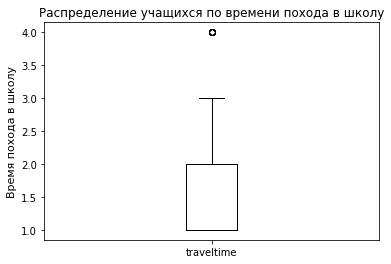

25-й квартиль: 1.0, 75-й квартиль: 2.0, IQR: 1.0, границы выбросов: [-0.5,3.5].


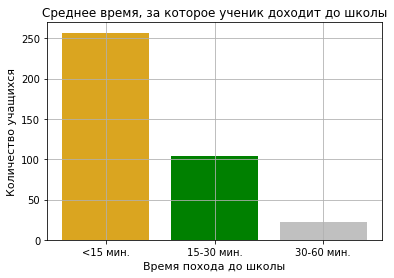

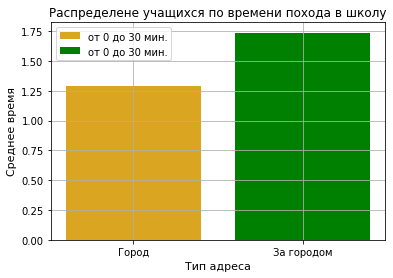

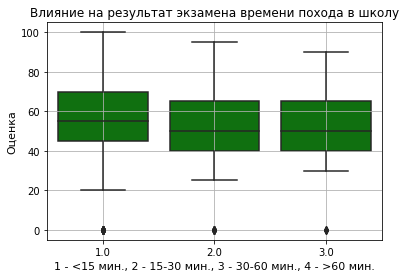

,traveltime
1.0,67.101828
2.0,27.154047
3.0,5.744125


,score,traveltime
score,1.000000,-0.079498
traveltime,-0.079498,1.000000


In [14]:
# Построим диаграмму с усами
data['traveltime'].plot(kind='box', color='black',title = 'Распределение учащихся по времени похода в школу')
plt.ylabel('Время похода в школу', fontsize=11, color='black')
plt.show()

# Границы выбросов
outliers(data['traveltime'])

# Очистка данных
data = data.loc[data['traveltime'].between(delete_outliers(data['traveltime'])[0],delete_outliers(data['traveltime'])[1])]

# Посмотрим на распределение признака
traveltime_1 = data[data['traveltime']==1]['school'].count()
traveltime_2 = data[data['traveltime']==2]['school'].count()
traveltime_3 = data[data['traveltime']==3]['school'].count()
#traveltime_4 = data[data['traveltime']==4]['school'].count()
fig, axes = plt.subplots()
axes.set(facecolor = 'white')
axes.grid(True)
axes.bar('<15 мин.', traveltime_1, color = 'goldenrod')
axes.bar('15-30 мин.', traveltime_2, color = 'green')
axes.bar('30-60 мин.', traveltime_3, color = 'silver')
#axes.bar('>60 мин.', traveltime_4, color = 'black')
axes.set_xlabel('Время похода до школы', color = 'black', size = 11)
axes.set_ylabel('Количество учащихся', color = 'black', size = 11)
axes.set_title('Среднее время, за которое ученик доходит до школы', color = 'black', size = 12)
plt.show()

# Вывод визуализации
address_U = data[data['address']=='U']['traveltime'].mean()
address_R = data[data['address']=='R']['traveltime'].mean()
fig, axes = plt.subplots()
axes.set(facecolor = 'white')
axes.grid(True)
axes.bar('Город', address_U, color = 'goldenrod', label = 'от 0 до 30 мин.')
axes.bar('За городом', address_R, color = 'green', label = 'от 0 до 30 мин.')
axes.set_xlabel('Тип адреса', color = 'black', size = 11)
axes.set_ylabel('Среднее время', color = 'black', size = 11)
axes.set_title('Распределене учащихся по времени похода в школу', color = 'black', size = 12)
axes.legend()
plt.show()

boxplot("traveltime","score",data,"Влияние на результат экзамена времени похода в школу","1 - <15 мин., 2 - 15-30 мин., 3 - 30-60 мин., 4 - >60 мин.","Оценка") 
plt.show()

# Дополнительная информация
dop(data['traveltime'])

# Корреляция
correlation('score','traveltime')

**Результат:** *После обработки стобец "traveltime" не содержит пустые значения. Данные **содержат выброс** - время похода в школу больше 60 мин., проведена очистка. ***94%*** *учащихся трятят на путь в школу меньше 30 мин. в день. Средние оценки выше у студентов, у которых время похода в школу составляет меньше 15 мин.* **Корреляция с "score" отрицательная и ниже 1.** 

#### 4.6 Famsize

In [15]:
# Описание значений в столбце
description_column(data['famsize'])
dop(data['famsize'])

# Замена нулевых значений на None
data['famsize'] = data['famsize'].apply(lambda x: None if pd.isnull(x) else None if x == 'nan' else x)

Количество уникальных значений в столбце: 2
Перечень уникальных значений: [nan 'GT3' 'LE3']
Длина столбца: 383
Количество значений "NaN": 26
Количество значений, встретившихся в столбце более 10 раз: 2


,famsize
GT3,70.868347
LE3,29.131653


*Столбец содержит 26 нулевых значений. Выборка студентов для модели должна быть случайной, поэтому для 26 строк сгенерируем случайные значения.*

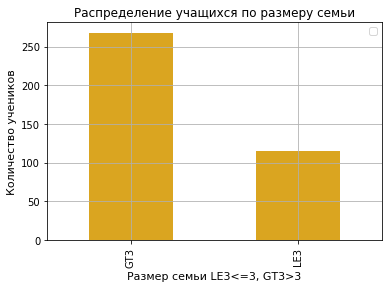

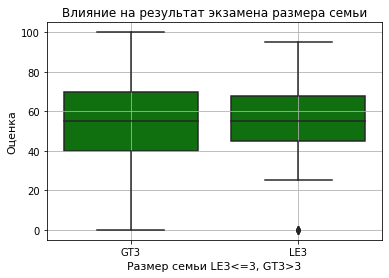

In [16]:
# Заполним пустые значения
data['famsize'] = data['famsize'].apply(lambda x: random.choice(['GT3','LE3']) if pd.isnull(x) else x)
data['famsize'].isnull().sum()

# Посмотрим на распределение признака
bar_pivot_table('school','famsize','count','Распределение учащихся по размеру семьи','Размер семьи LE3<=3, GT3>3','Количество учеников')
boxplot("famsize","score",data,"Влияние на результат экзамена размера семьи","Размер семьи LE3<=3, GT3>3","Оценка")

**Результат:** *в столбце "famsize" нет пустых значений (заменены на случайные величины), нет выбросов. У ***71%*** учащихся семья состоит из 3 и более человек.* *Несмотря на то, что средние оценки учащихся 2-х групп равны, размах в группе студентов, живущих в семье GT3, больше.* **Корреляция с "score" не оценивалась.**

#### 4.7 Pstatus

Количество уникальных значений в столбце: 2
Перечень уникальных значений: ['A' nan 'T']
Длина столбца: 383
Количество значений "NaN": 43
Количество значений, встретившихся в столбце более 10 раз: 2


,Pstatus
T,90.0
A,10.0


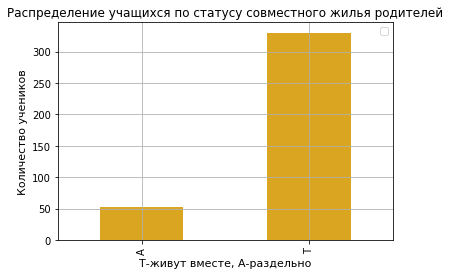

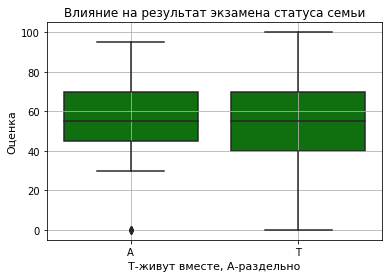

In [17]:
# Описание значений в столбце
description_column(data['Pstatus'])
dop(data['Pstatus'])

# Замена нулевых значений на None
data['Pstatus'] = data['Pstatus'].apply(lambda x: None if pd.isnull(x) else None if x == 'nan' else x)

# Заполним пустые значения
data['Pstatus'] = data['Pstatus'].apply(lambda x: random.choice(['A','T']) if pd.isnull(x) else x)

# Посмотрим на распределение признака
bar_pivot_table('school','Pstatus','count','Распределение учащихся по статусу совместного жилья родителей','T-живут вместе, A-раздельно','Количество учеников')
boxplot("Pstatus","score",data,"Влияние на результат экзамена статуса семьи","T-живут вместе, A-раздельно","Оценка")

**Результат:** *столбец "pstatus" не содержит нулевые значения (нулевые значения заполнены случайными величинами), выбросы. 90% учащихся живут в семье с двумя родителями. Средние оценки учащихся в группе Т и А не отличаются, однако розброс в группе Т больше.* **Корреляция с "score" не оценивалась.**

#### 4.8 Medu

Количество уникальных значений в столбце: 5
Перечень уникальных значений: [ 4.  1.  3.  2. nan  0.]
Длина столбца: 383
Количество значений "NaN": 3
Количество значений, встретившихся в столбце более 10 раз: 4


,Medu
4.0,33.947368
2.0,25.789474
3.0,25.000000
1.0,14.473684
0.0,0.789474


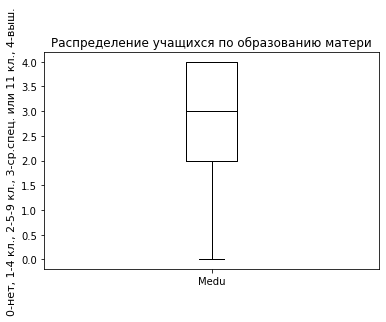

25-й квартиль: 2.0, 75-й квартиль: 4.0, IQR: 2.0, границы выбросов: [-1.0,7.0].


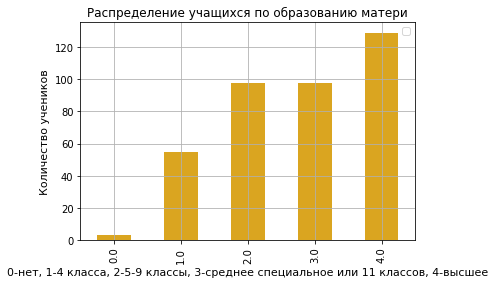

,score,Medu
score,1.000000,0.202417
Medu,0.202417,1.000000


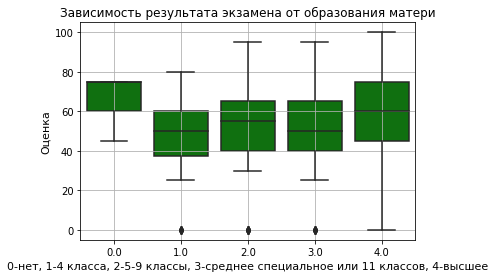

In [18]:
# Описание значений в столбце
description_column(data['Medu'])
dop(data['Medu'])

# Замена нулевых значений на None
data['Medu'] = data['Medu'].apply(lambda x: None if pd.isnull(x) else None if x == 'nan' else x)

# Заполним пустые значения
data['Medu'] = data['Medu'].apply(lambda x: round(data[data['Medu']!=0]['Medu'].mean()) if pd.isnull(x) else x)

# Построим диаграмму с усами
data['Medu'].plot(kind='box', color='black',title = 'Распределение учащихся по образованию матери')
plt.ylabel('0-нет, 1-4 кл., 2-5-9 кл., 3-ср.спец. или 11 кл., 4-выш.', fontsize=11, color='black')
plt.show()

# Границы выбросов
outliers(data['Medu'])

# Посмотрим на распределение признака
bar_pivot_table('school','Medu','count','Распределение учащихся по образованию матери','0-нет, 1-4 класса, 2-5-9 классы, 3-среднее специальное или 11 классов, 4-высшее','Количество учеников')
boxplot("Medu","score",data,"Зависимость результата экзамена от образования матери","0-нет, 1-4 класса, 2-5-9 классы, 3-среднее специальное или 11 классов, 4-высшее","Оценка")

# Корреляция
correlation('score','Medu')

**Результат:** *столбец "medu" не содержит нулевые значения (нулевые строки заполнялись средними значениями).* **Выбросов нет**. *У мам 60% учащихся среднеспециальное и высшее образование. Наблюдается высокий средний бал у учеников, у которых мамы не имеют образования.* **Корреляция с "score" положительная, но значительно ниже 1.**

#### 4.9 Fedu

In [19]:
# Замена нулевых значений на None
data['Fedu'] = data['Fedu'].apply(lambda x: None if pd.isnull(x) else None if x == 'nan' else x)

# Применение функции Fedu
data['Fedu']=data.apply(lambda x: Fedu(x['Fedu']), axis=1)

*В столбце "Fedu" содержится **ошибка:** значение 40, вероятней всего, имелось в виду значение 4, т.е. высшее образование. Для исправления применим функцию.*

Количество уникальных значений в столбце: 5
Перечень уникальных значений: [ 4.  1.  2.  3. nan  0.]
Длина столбца: 383
Количество значений "NaN": 24
Количество значений, встретившихся в столбце более 10 раз: 4


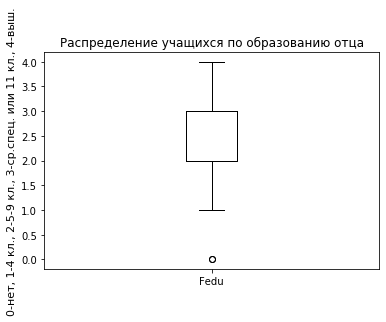

25-й квартиль: 2.0, 75-й квартиль: 3.0, IQR: 1.0, границы выбросов: [0.5,4.5].


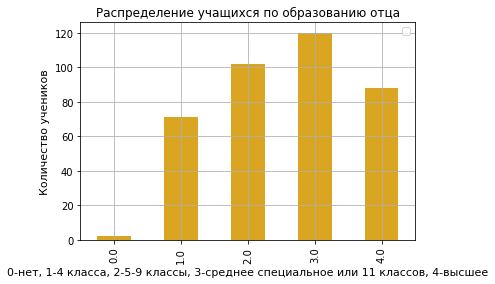

,Fedu
3.0,31.331593
2.0,26.631854
4.0,22.976501
1.0,18.537859
0.0,0.522193


,score,Fedu
score,1.000000,0.120168
Fedu,0.120168,1.000000


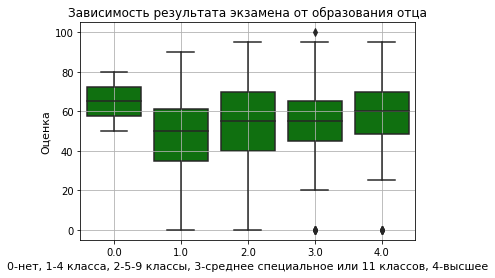

In [20]:
# Описание значений в столбце
description_column(data['Fedu'])

# Заполним пустые значения
data['Fedu'] = data['Fedu'].apply(lambda x: round(data[data['Fedu']!=0]['Fedu'].mean()) if pd.isnull(x) else x)

# Построим диаграмму с усами
data['Fedu'].plot(kind='box', color='black',title = 'Распределение учащихся по образованию отца')
plt.ylabel('0-нет, 1-4 кл., 2-5-9 кл., 3-ср.спец. или 11 кл., 4-выш.', fontsize=11, color='black')
plt.show()

# Границы выбросов
outliers(data['Fedu'])

# Посмотрим на распределение признака
bar_pivot_table('school','Fedu','count','Распределение учащихся по образованию отца','0-нет, 1-4 класса, 2-5-9 классы, 3-среднее специальное или 11 классов, 4-высшее','Количество учеников')
boxplot("Fedu","score",data,"Зависимость результата экзамена от образования отца","0-нет, 1-4 класса, 2-5-9 классы, 3-среднее специальное или 11 классов, 4-высшее","Оценка")

# Дополнительная информация
dop(data['Fedu'])

# Корреляция
correlation('score','Fedu')

**Результат:** *столбец "fedu" не содержит нулевые значения (нули заменены на средние).**В столбце есть выбросы** - отсутствие образования у отца (=0.5%, 2 человека). Не принимаем решения об удалении выброса.* **Корреляция с "score" положительная, но значительно ниже 1.**

**Интересный факт:** *согласно полученным данным, если родители учащегося не имеют образования, то его средний бал (и разброс) выше средних балов других учащихся. Мы можем предположить, что такие студенты более замотивированы получить высшее образование и тратят на подготовку к экзамену больше времени.*

#### 4.10 Mjob

Количество уникальных значений в столбце: 5
Перечень уникальных значений: ['at_home' 'health' 'other' 'services' 'teacher' nan]
Длина столбца: 383
Количество значений "NaN": 19
Количество значений, встретившихся в столбце более 10 раз: 5


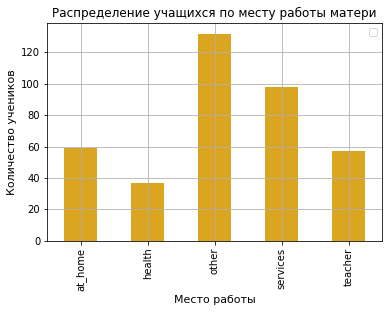

,Mjob
other,34.464752
services,25.587467
at_home,15.404700
teacher,14.882507
health,9.660574


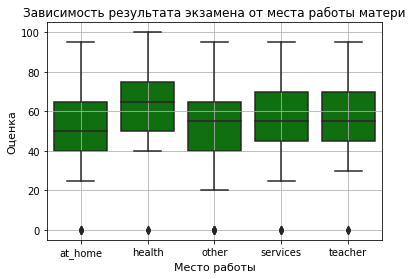

In [21]:
# Описание значений в столбце
description_column(data['Mjob'])

# Замена нулевых значений на None
data['Mjob'] = data['Mjob'].apply(lambda x: None if pd.isnull(x) else None if x == 'nan' else x)

# Заполним пустые значения
data['Mjob'] = data['Mjob'].apply(lambda x: random.choice(['at_home','health','other','services','teacher']) if pd.isnull(x) else x)
data['Mjob'].isnull().sum()

# Посмотрим на распределение признака
bar_pivot_table('school','Mjob','count','Распределение учащихся по месту работы матери','Место работы','Количество учеников')
boxplot("Mjob","score",data,"Зависимость результата экзамена от места работы матери","Место работы","Оценка")

# Дополнительная информация
dop(data['Mjob'])

**Результат:** *столбец "Mjob" не содержит нулевые значения (нули заменены сгенерированными случайными величинами).* **Выбросов нет.** *35% матерей работают в сферах не связанных с здравоохранением, услугами, преподаванием. 16% - домохозяйки. Средний бал студентов, мамы которых работают в сфере здравоохранения, выше.* **Корреляция с "score" не оценивалась.**

#### 4.11 Fjob

Количество уникальных значений в столбце: 5
Перечень уникальных значений: ['teacher' 'other' nan 'health' 'services' 'at_home']
Длина столбца: 383
Количество значений "NaN": 36
Количество значений, встретившихся в столбце более 10 раз: 5


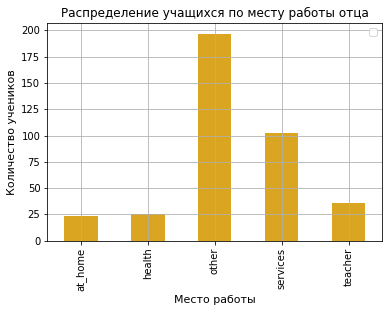

,Fjob
other,51.436031
services,26.631854
teacher,9.399478
health,6.527415
at_home,6.005222


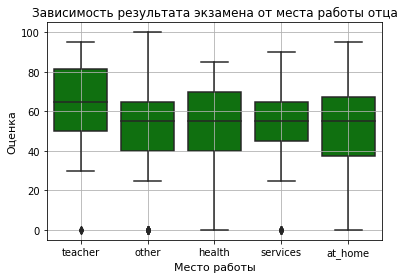

In [22]:
# Описание значений в столбце
description_column(data['Fjob'])

# Замена нулевых значений на None
data['Fjob'] = data['Fjob'].apply(lambda x: None if pd.isnull(x) else None if x == 'nan' else x)

# Заполним пустые значения
data['Fjob'] = data['Fjob'].apply(lambda x: random.choice(['at_home','health','other','services','teacher']) if pd.isnull(x) else x)
data['Fjob'].isnull().sum()

# Посмотрим на распределение признака
bar_pivot_table('school','Fjob','count','Распределение учащихся по месту работы отца','Место работы','Количество учеников')
boxplot("Fjob","score",data,"Зависимость результата экзамена от места работы отца","Место работы","Оценка")

# Дополнительная информация
dop(data['Fjob'])

**Результат:** *столбец "Fjob" содержит нулевые значения (нули заменены на случайные величины).* **Выбросов нет.** *51% отцов работают в сферах не связанных с здравоохранением, услугами, преподаванием. 5% - не работают. Средний бал студентов, папы которых работают в сфере образования, выше.* **Корреляция "score" не оценивалась.**

#### 4.12 Reason

Количество уникальных значений в столбце: 4
Перечень уникальных значений: ['course' 'other' 'home' 'reputation' nan]
Длина столбца: 383
Количество значений "NaN": 17
Количество значений, встретившихся в столбце более 10 раз: 4


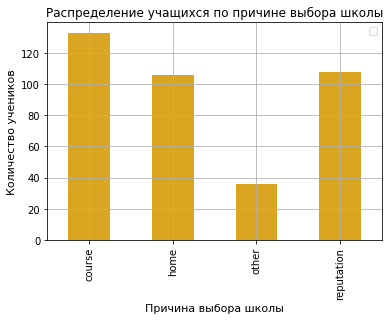

,reason
course,34.725849
reputation,28.198433
home,27.676240
other,9.399478


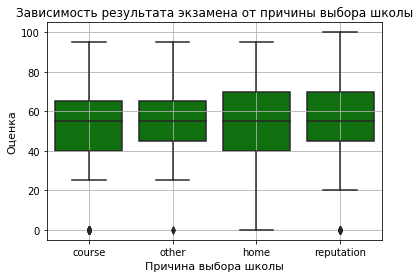

In [23]:
# Описание значений в столбце
description_column(data['reason'])

# Замена нулевых значений на None
data['reason'] = data['reason'].apply(lambda x: None if pd.isnull(x) else None if x == 'nan' else x)

# Заполним пустые значения
data['reason'] = data['reason'].apply(lambda x: random.choice(['course','other','home','reputation']) if pd.isnull(x) else x)
data['reason'].isnull().sum()

# Посмотрим на распределение признака
bar_pivot_table('school','reason','count','Распределение учащихся по причине выбора школы','Причина выбора школы','Количество учеников')
boxplot("reason","score",data,"Зависимость результата экзамена от причины выбора школы","Причина выбора школы","Оценка")

# Дополнительная информация
dop(data['reason'])

**Результат:** *столбец "reason" не содержит нулевые значения (нули заменены случайными величинами).* **Выбросов нет.** *34% учащихся выбрали школу из-за образовательной программы, 29% - из-за близости к дому, на выбор 27% повлияла репутация. При этом разброс среднх оценок учащихся, выбравших школу из-за образовательной программы, шире.* **Корреляция "score" не оценивалась.**

#### 4.13 Guardian

Количество уникальных значений в столбце: 3
Перечень уникальных значений: ['mother' 'father' 'other' nan]
Длина столбца: 383
Количество значений "NaN": 27
Количество значений, встретившихся в столбце более 10 раз: 3


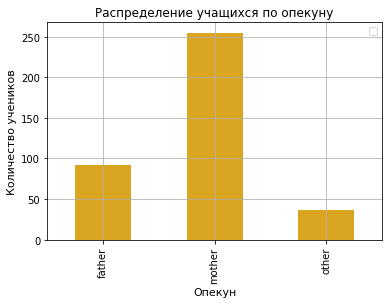

,guardian
mother,66.579634
father,24.020888
other,9.399478


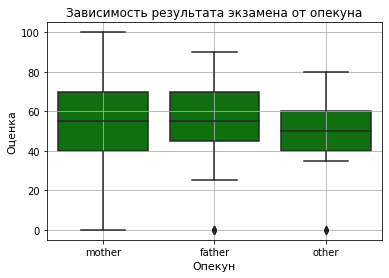

In [24]:
# Описание значений в столбце
description_column(data['guardian'])

# Замена нулевых значений на None
data['guardian'] = data['guardian'].apply(lambda x: None if pd.isnull(x) else None if x == 'nan' else x)

# Заполним пустые значения
data['guardian'] = data['guardian'].apply(lambda x: random.choice(['mother','father','other']) if pd.isnull(x) else x)
data['guardian'].isnull().sum()

# Посмотрим на распределение признака
bar_pivot_table('school','guardian','count','Распределение учащихся по опекуну','Опекун','Количество учеников')
boxplot("guardian","score",data,"Зависимость результата экзамена от опекуна","Опекун","Оценка")

# Дополнительная информация
dop(data['guardian'])

**Результат:** *столбец "guardian" не содержит нулевые значения (нули заменены случайными величинами).* **Выбросов нет** *У 66% учасщихся опекуном выступает мама, у 24% - отец, у 8% - другие родственники. При этом разброс средних оценок учащихся, у которых опекуном выступают мама, шире.* **Корреляция "score" не оценивалась.**

#### 4.14 Studytime

Количество уникальных значений в столбце: 4
Перечень уникальных значений: [ 2.  3.  1. nan  4.]
Длина столбца: 383
Количество значений "NaN": 7
Количество значений, встретившихся в столбце более 10 раз: 4


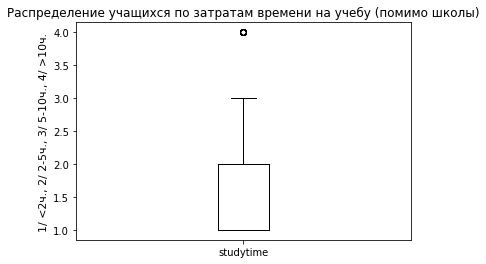

25-й квартиль: 1.0, 75-й квартиль: 2.0, IQR: 1.0, границы выбросов: [-0.5,3.5].


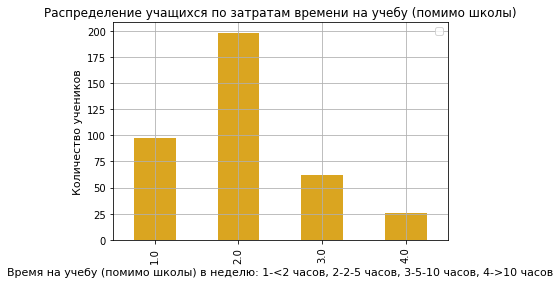

,studytime
2.0,51.697128
1.0,25.326371
3.0,16.187990
4.0,6.788512


,score,studytime
score,1.000000,0.112382
studytime,0.112382,1.000000


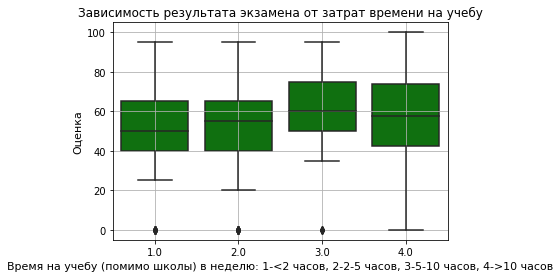

In [25]:
# Описание значений в столбце
description_column(data['studytime'])

# Заполним пустые значения
data['studytime'] = data['studytime'].apply(lambda x: round(data[data['studytime']!=0]['studytime'].mean()) if pd.isnull(x) else x)
data['studytime'].isnull().sum()

# Построим диаграмму с усами
data['studytime'].plot(kind='box', color='black',title = 'Распределение учащихся по затратам времени на учебу (помимо школы)')
plt.ylabel('1/ <2ч., 2/ 2-5ч., 3/ 5-10ч., 4/ >10ч.', fontsize=11, color='black')
plt.show()

# Границы выбросов
outliers(data['studytime'])

# Замена нулевых значений на None
data['studytime'] = data['studytime'].apply(lambda x: None if pd.isnull(x) else None if x == 'nan' else x)

# Посмотрим на распределение признака
bar_pivot_table('school','studytime','count','Распределение учащихся по затратам времени на учебу (помимо школы)','Время на учебу (помимо школы) в неделю: 1-<2 часов, 2-2-5 часов, 3-5-10 часов, 4->10 часов','Количество учеников')
boxplot("studytime","score",data,"Зависимость результата экзамена от затрат времени на учебу","Время на учебу (помимо школы) в неделю: 1-<2 часов, 2-2-5 часов, 3-5-10 часов, 4->10 часов","Оценка")

# Дополнительная информация
dop(data['studytime'])

# Корреляция
correlation('score','studytime')

**Результат:** *столбец "studytime" не содержит нулевые значения (нули заменены средними значениями). **В столбце "studytime" есть выброс - учащиеся, тратящие на учебу более 10 ч. в неделю.** Не удаляем выбросы.* **Корреляция с "score" положительная, но значительно меньше 1.**

#### 4.15 Failures

Количество уникальных значений в столбце: 4
Перечень уникальных значений: [ 0.  3. nan  2.  1.]
Длина столбца: 383
Количество значений "NaN": 21
Количество значений, встретившихся в столбце более 10 раз: 4
25-й квартиль: 0.0, 75-й квартиль: 0.0, IQR: 0.0, границы выбросов: [0.0,0.0].


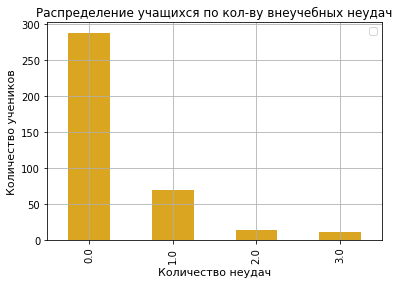

,failures
0.0,75.195822
1.0,18.276762
2.0,3.655352
3.0,2.872063


,score,failures
score,1.000000,-0.329913
failures,-0.329913,1.000000


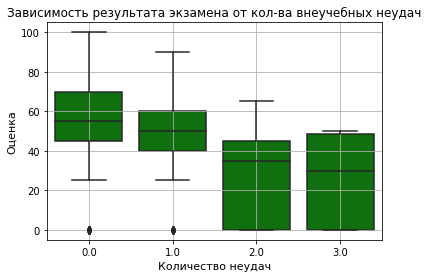

In [26]:
# Описание значений в столбце
description_column(data['failures'])

# Заполним пустые значения
data['failures'] = data['failures'].apply(lambda x: round(data[data['failures']!=0]['failures'].mean()) if pd.isnull(x) else x)
data['failures'].isnull().sum()

# Границы выбросов
outliers(data['failures'])

# Замена нулевых значений на None
data['failures'] = data['failures'].apply(lambda x: None if pd.isnull(x) else None if x == 'nan' else x)

# Посмотрим на распределение признака
bar_pivot_table('school','failures','count','Распределение учащихся по кол-ву внеучебных неудач','Количество неудач','Количество учеников')
boxplot("failures","score",data,"Зависимость результата экзамена от кол-ва внеучебных неудач","Количество неудач","Оценка")

# Дополнительная информация
dop(data['failures'])

# Корреляция
correlation('score','failures')

**Результат:** *столбец "failures" не содержит нулевые значения (заменены средними). **Есть выбросы - количество неудач больше 1.** *Не принимаем решения по удалению выбросов.* 
У 75% учащихся не было внеучебных неудач. Средний бал студента ниже, чем больше неудач у него было.* **Корреляция с "score" отрицательная и значительно ниже 1.**

#### 4.16 Schoolsup

Количество уникальных значений в столбце: 2
Перечень уникальных значений: ['yes' 'no' nan]
Длина столбца: 383
Количество значений "NaN": 8
Количество значений, встретившихся в столбце более 10 раз: 2


,schoolsup
no,86.933333
yes,13.066667


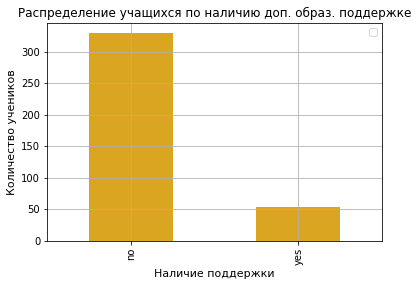

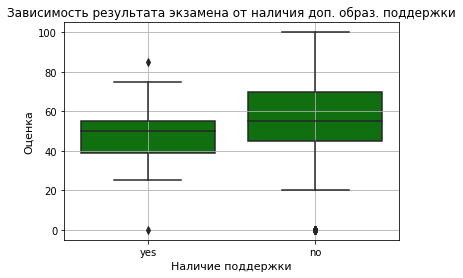

In [27]:
# Описание значений в столбце
description_column(data['schoolsup'])
dop(data['schoolsup'])

# Замена нулевых значений на None
data['schoolsup'] = data['schoolsup'].apply(lambda x: None if pd.isnull(x) else None if x == 'nan' else x)

# Заполним пустые значения
data['schoolsup'] = data['schoolsup'].apply(lambda x: random.choice(['yes','no']) if pd.isnull(x) else x)
data['schoolsup'].isnull().sum()

# Посмотрим на распределение признака
bar_pivot_table('school','schoolsup','count','Распределение учащихся по наличию доп. образ. поддержке','Наличие поддержки','Количество учеников')
boxplot("schoolsup","score",data,"Зависимость результата экзамена от наличия доп. образ. поддержки","Наличие поддержки","Оценка")

**Результат:** *столбец "schoolsup" не содержит нулевые значения (нули заменены на случайные величины). **В столбце "schoolsup" нет выбросов.** 
У 87% учащихся нет дополнительной образовательной поддержки. Если у студента есть образовательная поддержка, то его средний бал ниже и разброс значений уже.* **Корреляция с "score" не оценивалась.**

#### 4.17 Famsup

Количество уникальных значений в столбце: 2
Перечень уникальных значений: ['no' 'yes' nan]
Длина столбца: 383
Количество значений "NaN": 36
Количество значений, встретившихся в столбце более 10 раз: 2


,famsup
yes,61.959654
no,38.040346


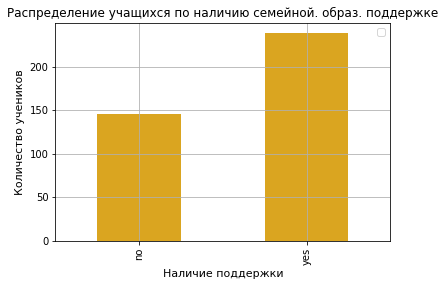

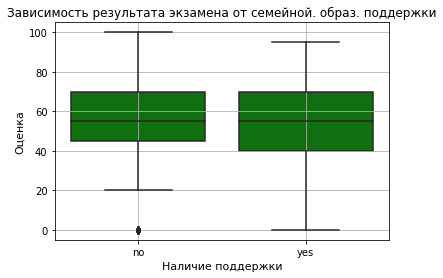

In [28]:
# Описание значений в столбце
description_column(data['famsup'])
dop(data['famsup'])

# Замена нулевых значений на None
data['famsup'] = data['famsup'].apply(lambda x: None if pd.isnull(x) else None if x == 'nan' else x)

# Заполним пустые значения
data['famsup'] = data['famsup'].apply(lambda x: random.choice(['yes','no']) if pd.isnull(x) else x)
data['famsup'].isnull().sum()

# Посмотрим на распределение признака
bar_pivot_table('school','famsup','count','Распределение учащихся по наличию семейной. образ. поддержке','Наличие поддержки','Количество учеников')
boxplot("famsup","score",data,"Зависимость результата экзамена от семейной. образ. поддержки","Наличие поддержки","Оценка")

**Результат:** *столбец "famsup" не содержит нулевые значения (заменены на случайные величины). **В столбце "famsup" нет выбросов.** 
У 62% учащихся есть семейная образовательная поддержка. Наличие семейной поддержки не влияет на средний бал, но влияет на разброс значений: если у учащегося есть поддержка, разброс шире.* **Корреляция с "score" не оценивалась.**

#### 4.18 Paid

Количество уникальных значений в столбце: 2
Перечень уникальных значений: ['no' nan 'yes']
Длина столбца: 383
Количество значений "NaN": 39
Количество значений, встретившихся в столбце более 10 раз: 2


,paid
no,56.104651
yes,43.895349


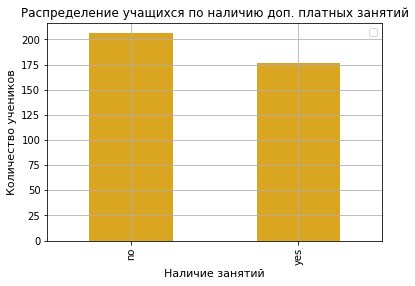

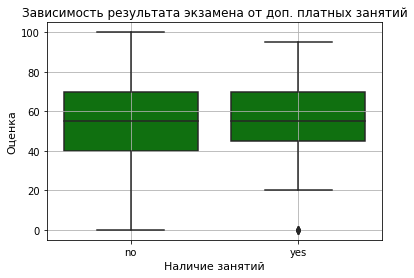

In [29]:
# Описание значений в столбце
description_column(data['paid'])
dop(data['paid'])

# Замена нулевых значений на None
data['paid'] = data['paid'].apply(lambda x: None if pd.isnull(x) else None if x == 'nan' else x)

# Заполним пустые значения
data['paid'] = data['paid'].apply(lambda x: random.choice(['yes','no']) if pd.isnull(x) else x)
data['paid'].isnull().sum()

# Посмотрим на распределение признака
bar_pivot_table('school','paid','count','Распределение учащихся по наличию доп. платных занятий','Наличие занятий','Количество учеников')
boxplot("paid","score",data,"Зависимость результата экзамена от доп. платных занятий","Наличие занятий","Оценка")

**Результат:** *столбец "paid" не содержит нулевые значения (заменены на случайные величины). **В столбце "paid" нет выбросов.** 
У 56% учащихся нет дополнительных платных занятий по математике. Однако у студентов, у которых есть дополнительные занятия, средний бал выше и разброс значений уже.* **Корреляция с "score" не оценивалась.**

#### 4.19 Activities

Количество уникальных значений в столбце: 2
Перечень уникальных значений: ['no' 'yes' nan]
Длина столбца: 383
Количество значений "NaN": 14
Количество значений, встретившихся в столбце более 10 раз: 2


,activities
yes,51.490515
no,48.509485


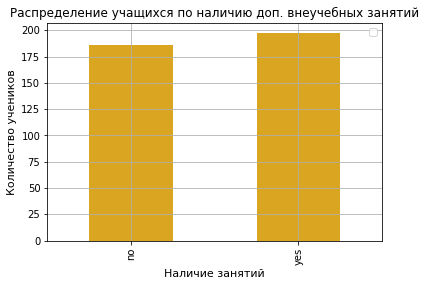

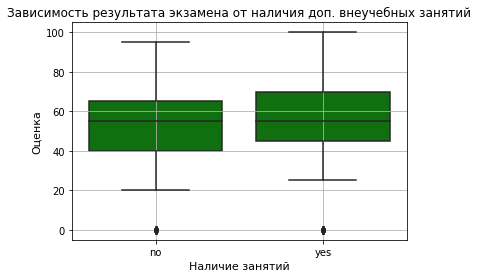

In [30]:
# Описание значений в столбце
description_column(data['activities'])
dop(data['activities'])

# Замена нулевых значений на None
data['activities'] = data['activities'].apply(lambda x: None if pd.isnull(x) else None if x == 'nan' else x)

# Заполним пустые значения
data['activities'] = data['activities'].apply(lambda x: random.choice(['yes','no']) if pd.isnull(x) else x)
data['activities'].isnull().sum()

# Посмотрим на распределение признака
bar_pivot_table('school','activities','count','Распределение учащихся по наличию доп. внеучебных занятий','Наличие занятий','Количество учеников')
boxplot("activities","score",data,"Зависимость результата экзамена от наличия доп. внеучебных занятий","Наличие занятий","Оценка")
print()

**Результат:** *столбец "activities" не содержит нулевые значения (заменены на случайные величины). **В столбце "activities" нет выбросов.** 
У 51% учащихся есть дополнительных внеучебные занятий, у таких студентов бал выше и разброс значений уже.* **Корреляция с "score" не оценивалась.**


#### 4.20 Nursery

Количество уникальных значений в столбце: 2
Перечень уникальных значений: ['yes' 'no' nan]
Длина столбца: 383
Количество значений "NaN": 16
Количество значений, встретившихся в столбце более 10 раз: 2


,nursery
yes,79.564033
no,20.435967


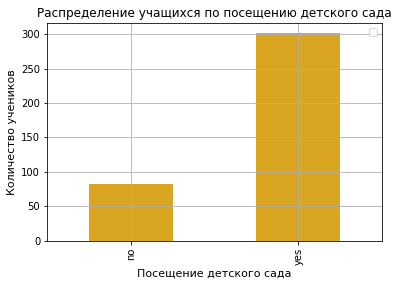

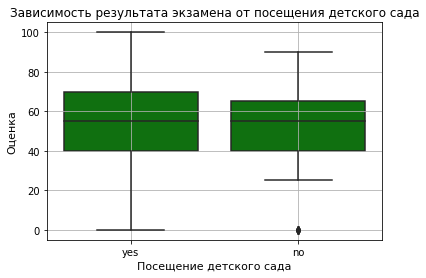

In [31]:
# Описание значений в столбце
description_column(data['nursery'])
dop(data['nursery'])

# Замена нулевых значений на None
data['nursery'] = data['nursery'].apply(lambda x: None if pd.isnull(x) else None if x == 'nan' else x)

# Заполним пустые значения
data['nursery'] = data['nursery'].apply(lambda x: random.choice(['yes','no']) if pd.isnull(x) else x)
data['nursery'].isnull().sum()

# Посмотрим на распределение признака
bar_pivot_table('school','nursery','count','Распределение учащихся по посещению детского сада','Посещение детского сада','Количество учеников')
boxplot("nursery","score",data,"Зависимость результата экзамена от посещения детского сада","Посещение детского сада","Оценка")

**Результат:** *столбец "nursery" не содержит нулевые значения (нули заменены на случайные величины). **В столбце "nursery" нет выбросов.** 
79% учащихся посещали детские сады, у таких студентов разброс значений больше.* **Корреляция с "score" не оценивалась.**

#### 4.21 Higher

Количество уникальных значений в столбце: 2
Перечень уникальных значений: ['yes' nan 'no']
Длина столбца: 383
Количество значений "NaN": 18
Количество значений, встретившихся в столбце более 10 раз: 2


,higher
yes,95.342466
no,4.657534


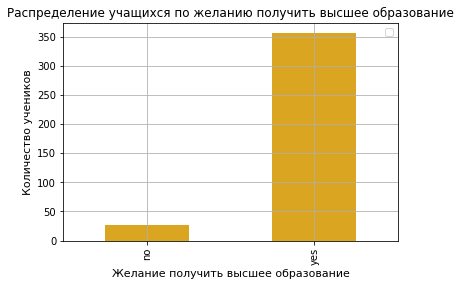

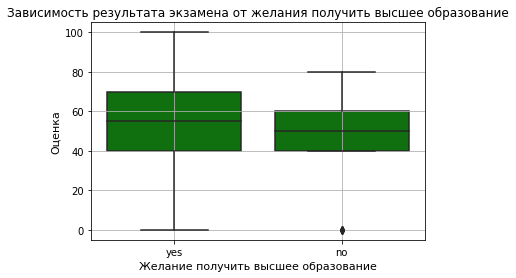

In [32]:
# Описание значений в столбце
description_column(data['higher'])
dop(data['higher'])

# Замена нулевых значений на None
data['higher'] = data['higher'].apply(lambda x: None if pd.isnull(x) else None if x == 'nan' else x)

# Заполним пустые значения
data['higher'] = data['higher'].apply(lambda x: random.choice(['yes','no']) if pd.isnull(x) else x)
data['higher'].isnull().sum()

# Посмотрим на распределение признака
bar_pivot_table('school','higher','count','Распределение учащихся по желанию получить высшее образование','Желание получить высшее образование','Количество учеников')
boxplot("higher","score",data,"Зависимость результата экзамена от желания получить высшее образование","Желание получить высшее образование","Оценка")

**Результат:** *столбец "higher" не содержит нулевых значений (нули заменены на случайный признак).* **Выбросов нет.** *95% учащихся хотят получить высшее образование. Как правило, их средний бал на экзамене выше.*. **Корреляция с "score" не оценивалась**

#### 4.22 Internet

Количество уникальных значений в столбце: 2
Перечень уникальных значений: [nan 'yes' 'no']
Длина столбца: 383
Количество значений "NaN": 34
Количество значений, встретившихся в столбце более 10 раз: 2


,internet
yes,85.100287
no,14.899713


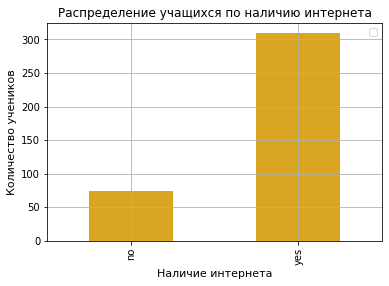

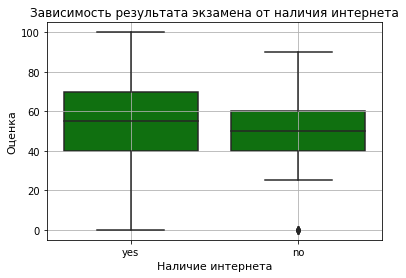

In [33]:
# Описание значений в столбце
description_column(data['internet'])
dop(data['internet'])

# Замена нулевых значений на None
data['internet'] = data['internet'].apply(lambda x: None if pd.isnull(x) else None if x == 'nan' else x)

# Заполним пустые значения
data['internet'] = data['internet'].apply(lambda x: random.choice(['yes','no']) if pd.isnull(x) else x)
data['internet'].isnull().sum()

# Посмотрим на распределение признака
bar_pivot_table('school','internet','count','Распределение учащихся по наличию интернета','Наличие интернета','Количество учеников')
boxplot("internet","score",data,"Зависимость результата экзамена от наличия интернета","Наличие интернета","Оценка")

**Результат:** *столбец "internet" не содержит нулевых значений (нули заменены на случайный признак).* **Выбросов нет.** *85% учащихся имеют доступ к интернету. Как правило, их средний бал на экзамене выше, однако больше разброс значений.*. **Корреляция с "score" не оценивалась**

#### 4.23 Romantic

Количество уникальных значений в столбце: 2
Перечень уникальных значений: ['no' nan 'yes']
Длина столбца: 383
Количество значений "NaN": 31
Количество значений, встретившихся в столбце более 10 раз: 2


,romantic
no,66.477273
yes,33.522727


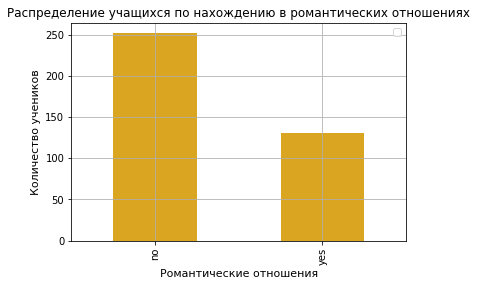

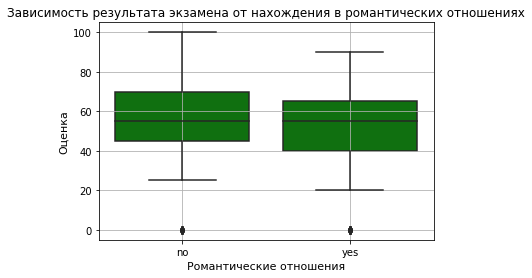

In [34]:
# Описание значений в столбце
description_column(data['romantic'])
dop(data['romantic'])

# Замена нулевых значений на None
data['romantic'] = data['romantic'].apply(lambda x: None if pd.isnull(x) else None if x == 'nan' else x)

# Заполним пустые значения
data['romantic'] = data['romantic'].apply(lambda x: random.choice(['yes','no']) if pd.isnull(x) else x)
data['romantic'].isnull().sum()

# Посмотрим на распределение признака
bar_pivot_table('school','romantic','count','Распределение учащихся по нахождению в романтических отношениях','Романтические отношения','Количество учеников')
boxplot("romantic","score",data,"Зависимость результата экзамена от нахождения в романтических отношениях","Романтические отношения","Оценка")

**Результат:** *столбец "romantic" не содержит нулевых значений (нули заменены на случайный признак).* **Выбросов нет.** *66% учащихся находятся в романтических отношениях. Как правило, у этой группы учащихся баллы ниже при равных средних*. **Корреляция с "score" не оценивалась**

#### 4.24 Famrel

In [35]:
# Описание значений в столбце
description_column(data['famrel'])
dop(data['famrel'])

# Замена нулевых значений на None
data['famrel'] = data['famrel'].apply(lambda x: None if pd.isnull(x) else None if x == 'nan' else x)

# Применение функции famrel
data['famrel']=data.apply(lambda x: famrel(x['famrel']), axis=1)

# Заполним пустые значения
data['famrel'] = data['famrel'].apply(lambda x: round(data[data['famrel']!=0]['famrel'].mean()) if pd.isnull(x) else x)
data['famrel'].isnull().sum()

Количество уникальных значений в столбце: 6
Перечень уникальных значений: [ 4.  5.  3. nan -1.  2.  1.]
Длина столбца: 383
Количество значений "NaN": 27
Количество значений, встретившихся в столбце более 10 раз: 4


,famrel
4.0,50.000000
5.0,25.842697
3.0,17.415730
2.0,4.775281
1.0,1.685393
-1.0,0.280899


0

25-й квартиль: 4.0, 75-й квартиль: 4.0, IQR: 0.0, границы выбросов: [4.0,4.0].


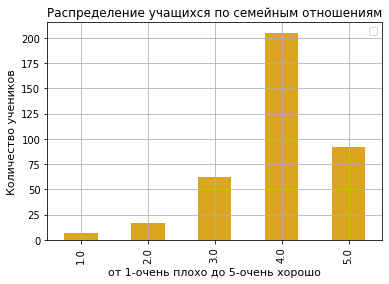

,score,famrel
score,1.000000,0.058633
famrel,0.058633,1.000000


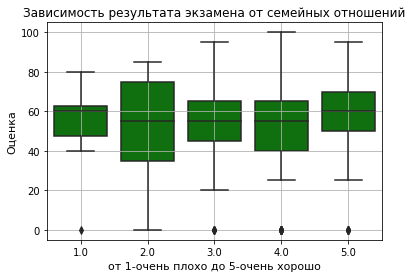

In [36]:
# Границы выбросов
outliers(data['famrel'])

# Посмотрим на распределение признака
bar_pivot_table('school','famrel','count','Распределение учащихся по семейным отношениям','от 1-очень плохо до 5-очень хорошо','Количество учеников')
boxplot("famrel","score",data,"Зависимость результата экзамена от семейных отношений","от 1-очень плохо до 5-очень хорошо","Оценка")

# Корреляция
correlation('score','famrel')

**Результат:** *столбец "famrel" не содержит нулевых значений (нули заменены средними величинами).* **Выбросы есть, не принимаем решения о их удалении.** *У 53% хорошие семейные отношения. У групп учащихся с хорошими семейными отношениями средний бал выше и разброс значений меньше*. **Корреляция с "score" положительная, но значительно ниже 1**

#### 4.26 Freetime

Количество уникальных значений в столбце: 5
Перечень уникальных значений: [ 3.  2.  4.  1.  5. nan]
Длина столбца: 383
Количество значений "NaN": 11
Количество значений, встретившихся в столбце более 10 раз: 5


,freetime
3.0,40.053763
4.0,29.301075
2.0,16.935484
5.0,8.870968
1.0,4.838710


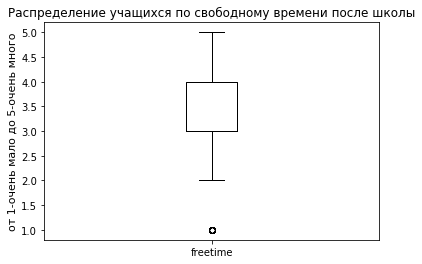

25-й квартиль: 3.0, 75-й квартиль: 4.0, IQR: 1.0, границы выбросов: [1.5,5.5].


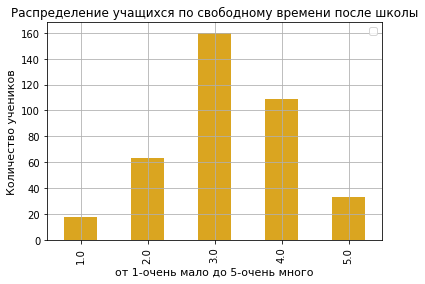

,score,freetime
score,1.000000,0.014024
freetime,0.014024,1.000000


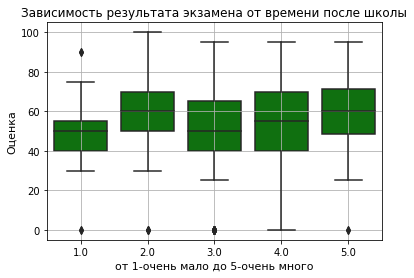

In [37]:
# Описание значений в столбце
description_column(data['freetime'])
dop(data['freetime'])

# Замена нулевых значений на None
data['freetime'] = data['freetime'].apply(lambda x: None if pd.isnull(x) else None if x == 'nan' else x)

# Заполним пустые значения
data['freetime'] = data['freetime'].apply(lambda x: round(data[data['freetime']!=0]['freetime'].mean()) if pd.isnull(x) else x)
data['freetime'].isnull().sum()

# Построим диаграмму с усами
data['freetime'].plot(kind='box', color='black',title = 'Распределение учащихся по свободному времени после школы')
plt.ylabel('от 1-очень мало до 5-очень много', fontsize=11, color='black')
plt.show()

# Границы выбросов
outliers(data['freetime'])

# Посмотрим на распределение признака
bar_pivot_table('school','freetime','count','Распределение учащихся по свободному времени после школы','от 1-очень мало до 5-очень много','Количество учеников')
boxplot("freetime","score",data,"Зависимость результата экзамена от времени после школы","от 1-очень мало до 5-очень много","Оценка")

# Корреляция
correlation('score','freetime')

**Результат:** *столбец "freetime" не содержит нулевых значений (нули заменены средними величинами).* **Выбросы есть, не принимаем решения о их удалении.** *У 69% учащихся довольно много свободного времени после школы. У таких групп студентов средний бал ниже.*. **Корреляция с "score" положительная, но значительно ниже 1.**

#### 4.27 Goout

Количество уникальных значений в столбце: 5
Перечень уникальных значений: [ 4.  3.  2.  1.  5. nan]
Длина столбца: 383
Количество значений "NaN": 8
Количество значений, встретившихся в столбце более 10 раз: 5


,goout
3.0,33.066667
2.0,26.400000
4.0,22.133333
5.0,12.266667
1.0,6.133333


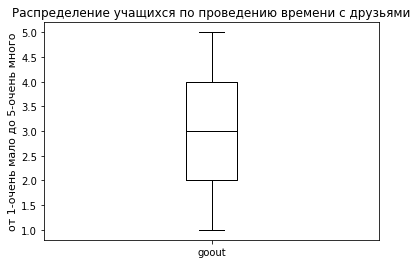

25-й квартиль: 2.0, 75-й квартиль: 4.0, IQR: 2.0, границы выбросов: [-1.0,7.0].


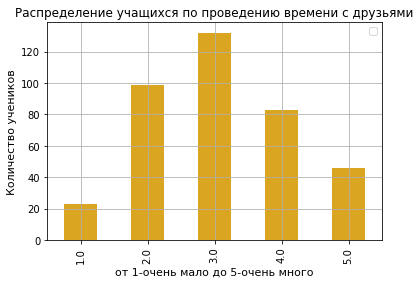

,score,goout
score,1.000000,-0.128536
goout,-0.128536,1.000000


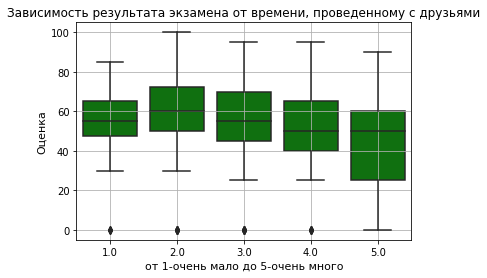

In [38]:
# Описание значений в столбце
description_column(data['goout'])
dop(data['goout'])

# Замена нулевых значений на None
data['goout'] = data['goout'].apply(lambda x: None if pd.isnull(x) else None if x == 'nan' else x)

# Заполним пустые значения
data['goout'] = data['goout'].apply(lambda x: round(data[data['goout']!=0]['goout'].mean()) if pd.isnull(x) else x)
data['goout'].isnull().sum()

# Построим диаграмму с усами
data['goout'].plot(kind='box', color='black',title = 'Распределение учащихся по проведению времени с друзьями')
plt.ylabel('от 1-очень мало до 5-очень много', fontsize=11, color='black')
plt.show()

# Границы выбросов
outliers(data['goout'])

# Посмотрим на распределение признака
bar_pivot_table('school','goout','count','Распределение учащихся по проведению времени с друзьями','от 1-очень мало до 5-очень много','Количество учеников')
boxplot("goout","score",data,"Зависимость результата экзамена от времени, проведенному с друзьями","от 1-очень мало до 5-очень много","Оценка")

# Корреляция
correlation('score','goout')

**Результат:** *столбец "goout" не содержит нулевых значений (нули заменены средними величинами).* **Выбросов нет.** *Чем больше времени проводят с друзьями учащиеся, тем ниже их средний бал.* **Корреляция с "score" отрицательная, но значительно ниже 1.**

#### 4.28 Health

Количество уникальных значений в столбце: 5
Перечень уникальных значений: [ 3.  5.  1.  2.  4. nan]
Длина столбца: 383
Количество значений "NaN": 14
Количество значений, встретившихся в столбце более 10 раз: 5


,health
5.0,36.585366
3.0,23.306233
4.0,16.260163
1.0,12.195122
2.0,11.653117


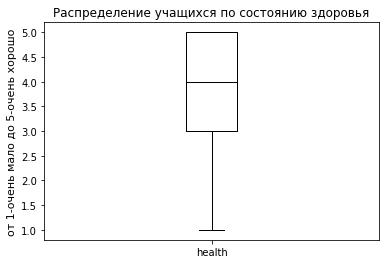

25-й квартиль: 3.0, 75-й квартиль: 5.0, IQR: 2.0, границы выбросов: [0.0,8.0].


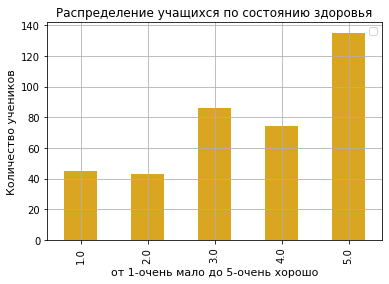

,score,health
score,1.000000,-0.078339
health,-0.078339,1.000000


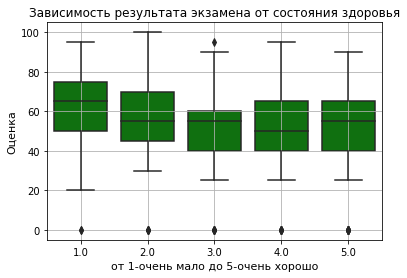

In [39]:
# Описание значений в столбце
description_column(data['health'])
dop(data['health'])

# Замена нулевых значений на None
data['health'] = data['health'].apply(lambda x: None if pd.isnull(x) else None if x == 'nan' else x)

# Заполним пустые значения
data['health'] = data['health'].apply(lambda x: round(data[data['health']!=0]['health'].mean()) if pd.isnull(x) else x)
data['health'].isnull().sum()

# Построим диаграмму с усами
data['health'].plot(kind='box', color='black',title = 'Распределение учащихся по состоянию здоровья')
plt.ylabel('от 1-очень мало до 5-очень хорошо', fontsize=11, color='black')
plt.show()

# Границы выбросов
outliers(data['health'])

# Посмотрим на распределение признака
bar_pivot_table('school','health','count','Распределение учащихся по состоянию здоровья','от 1-очень мало до 5-очень хорошо','Количество учеников')
boxplot("health","score",data,"Зависимость результата экзамена от состояния здоровья","от 1-очень мало до 5-очень хорошо","Оценка")

# Корреляция
correlation('score','health')

**Результат:** *столбец "health" не содержит нулевых значений (нули заменены средними величинами).* **Выбросов нет.** *Наблюдается необычная ситуация, когда студент хуже себя чувствует, его вредний бал выше, однока разброс значений шире*. **Корреляция с "score" отрицательная, но значительно ниже 1.**

#### 4.29 Absences

Количество уникальных значений в столбце: 35
Перечень уникальных значений: [  6.   4.  10.   2.   0.  16.  nan  14.   7.   8.  25.  12.  54.  18.
  26.  20.  56.  24.  28.   5.  13.  15.  22.   3. 385.  21.   1.  75.
  30.  19.   9.  11.  38.  40.  23.  17.]
Длина столбца: 383
Количество значений "NaN": 12
Количество значений, встретившихся в столбце более 10 раз: 8
25-й квартиль: 0.0, 75-й квартиль: 8.0, IQR: 8.0, границы выбросов: [-12.0,20.0].


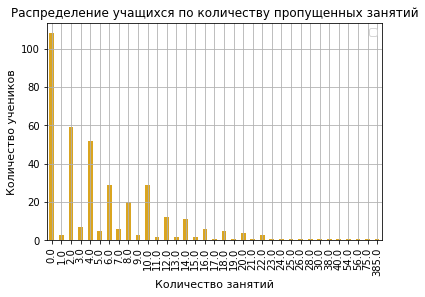

,score,absences
score,1.000000,0.083092
absences,0.083092,1.000000


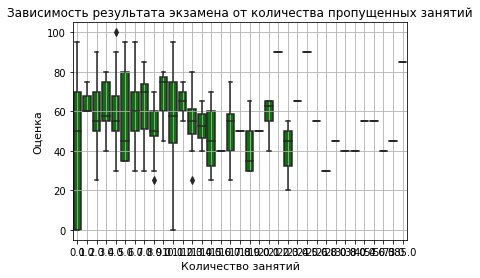

In [40]:
# Описание значений в столбце
description_column(data['absences'])

# Замена нулевых значений на None
data['absences'] = data['absences'].apply(lambda x: None if pd.isnull(x) else None if x == 'nan' else x)

# Заполним пустые значения
data['absences'] = data['absences'].apply(lambda x: round(data[data['absences']!=0]['absences'].mean()) if pd.isnull(x) else x)
data['absences'].isnull().sum()

# Границы выбросов
outliers(data['absences'])

# Посмотрим на распределение признака
bar_pivot_table('school','absences','count','Распределение учащихся по количеству пропущенных занятий','Количество занятий','Количество учеников')
boxplot("absences","score",data,"Зависимость результата экзамена от количества пропущенных занятий","Количество занятий","Оценка")

# Корреляция
correlation('score','absences')

**Результат:** *столбец "absences" не содержит нулевых значений (нули заменены средними величинами).* **Есть выбросы, не принимаем решения об их удалении.** *Чем больше студент пропускает, тем меньше его средний бал*. **Корреляция с "score" положительная, но значительно ниже 1.**

#### 4.30 Score

Количество уникальных значений в столбце: 18
Перечень уникальных значений: [ 30.  50.  75.  55.  95.  45.  60.  70.  80.  25.  40.  85.  90.  65.
 100.  35.   0.  nan  20.]
Длина столбца: 383
Количество значений "NaN": 6
Количество значений, встретившихся в столбце более 10 раз: 12
25-й квартиль: 40.0, 75-й квартиль: 70.0, IQR: 30.0, границы выбросов: [-5.0,115.0].


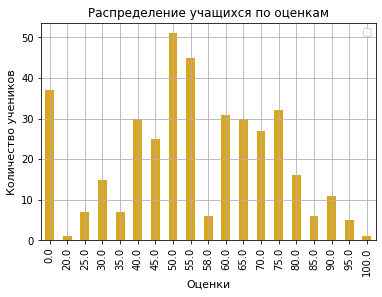

In [41]:
# Описание значений в столбце
description_column(data['score'])

# Замена нулевых значений на None
data['score'] = data['score'].apply(lambda x: None if pd.isnull(x) else None if x == 'nan' else x)

# Заполним пустые значения
data['score'] = data['score'].apply(lambda x: round(data[data['score']!=0]['score'].mean()) if pd.isnull(x) else x)
data['score'].isnull().sum()

# Границы выбросов
outliers(data['score'])

# Посмотрим на распределение признака
bar_pivot_table('school','score','count','Распределение учащихся по оценкам','Оценки','Количество учеников')

**Результат:** *столбец "score" не содержит нулевых значений (нули заменены средними величинами).* **Выбросов нет.**

#### Результат обработки data

In [42]:
data.info()
data.describe()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 383 entries, 0 to 394
Data columns (total 30 columns):
school                 383 non-null object
sex                    383 non-null object
age                    383 non-null int64
address                383 non-null object
famsize                383 non-null object
Pstatus                383 non-null object
Medu                   383 non-null float64
Fedu                   383 non-null float64
Mjob                   383 non-null object
Fjob                   383 non-null object
reason                 383 non-null object
guardian               383 non-null object
traveltime             383 non-null float64
studytime              383 non-null float64
failures               383 non-null float64
schoolsup              383 non-null object
famsup                 383 non-null object
paid                   383 non-null object
activities             383 non-null object
nursery                383 non-null object
studytime, granular    376 non-

,age,Medu,Fedu,traveltime,studytime,failures,"studytime, granular",famrel,freetime,goout,health,absences,score
count,383.000000,383.000000,383.000000,383.000000,383.000000,383.000000,376.000000,383.000000,383.000000,383.000000,383.000000,383.000000,383.000000
mean,16.647520,2.770235,2.577023,1.386423,2.044386,0.342037,-6.135638,3.934726,3.198433,3.078329,3.550914,6.885117,52.331593
std,1.201455,1.089912,1.052892,0.594057,0.828557,0.686811,2.508696,0.861279,0.972016,1.092154,1.373608,20.978233,22.940105
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,-12.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,16.000000,2.000000,2.000000,1.000000,1.000000,0.000000,-6.000000,4.000000,3.000000,2.000000,3.000000,0.000000,40.000000
50%,17.000000,3.000000,3.000000,1.000000,2.000000,0.000000,-6.000000,4.000000,3.000000,3.000000,4.000000,4.000000,55.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,-3.000000,4.000000,4.000000,4.000000,5.000000,8.000000,70.000000
max,19.000000,4.000000,4.000000,3.000000,4.000000,3.000000,-3.000000,5.000000,5.000000,5.000000,5.000000,385.000000,100.000000


### 5. Корреляционный анализ

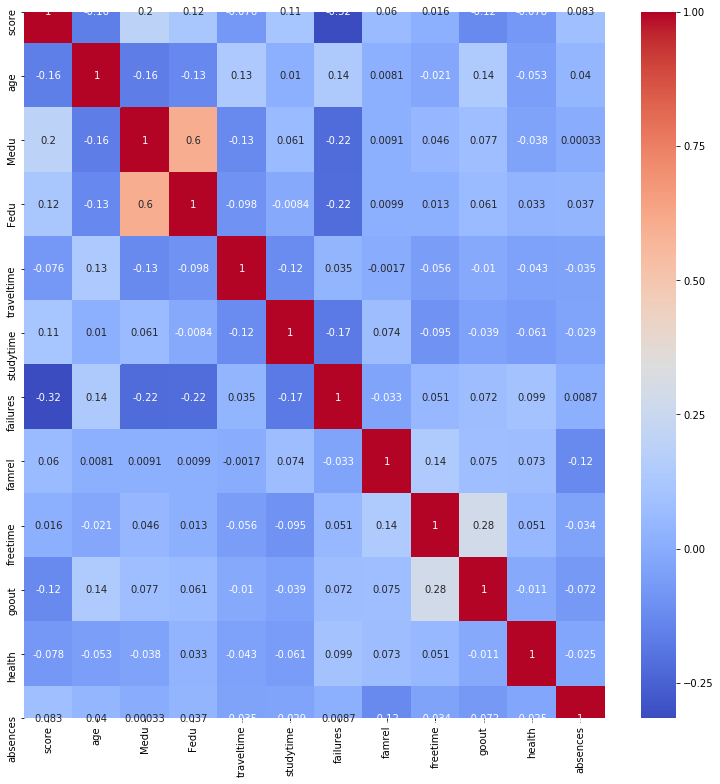

In [43]:
plt.figure(figsize=(13, 13))
column = ['score','age','Medu','Fedu','traveltime','studytime','failures','famrel','freetime','goout','health','absences']
corr_heatmap = sns.heatmap(data[column].corr(),
                 cbar=True,
                 annot=True,
                 cmap='coolwarm')


**Результат:** *столбец "score" коррелирует со следующими столбцами:
* -0.32 "failures" (чем больше внеучебных неудач бывает у учащегося, тем ниже бал за экзамен); 
* 0.2 "Medu" (чем выше образование матери, тем выше бал за экзамен);
* -0.16 "age" (чем выше возраст, тем меньше бал за экзамен);
* -0.12 "goout" (чем больше времени проводит учащийся с друзьями, тем ниже бал на экзамене); 
* 0.11 "studytime" (чем больше времени на учебу тратит учащийся, тем выше бал).

### 6. Анализ номинативных переменных

In [44]:
for col in ['school','sex', 'address', 'famsize', 'Pstatus', 'Mjob', 'Fjob', 'reason', 'guardian', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic']:
    get_stat_dif(col)

Найдены статистически значимые различия для колонки sex
Найдены статистически значимые различия для колонки address
Найдены статистически значимые различия для колонки higher
Найдены статистически значимые различия для колонки romantic


### 7. Результаты исследования

*В результате анализа влияния условий жизни учащегося в возрасте от 15 до 22 лет на успешность сдачи экзамена по математике были получены следующие выводы:*
* *в данных довольно много пустых значений, которые мы обработали следующими способами:*
    1. *заполнили, опираясь на данные из других столбцов;*
    2. *проставили среднее значение (для числовые столбцов);*
    3. *проставили рандомный признак (для текстовых столбцов).*
* *данные содержат выбросы, часть из которых была обработана путем удаления из датасета, часть была оставлена (мы считаем, что выбросы описывают типичность некоторых групп учеников, решение об их удалении/не удалении будет принято при дальнейшем анализе);*
* *наблюдается положительная корреляция в столбцах с оценкой и временем, которое учащийся тратит на учебу, образованием мамы;*
* *наблюдается отрицательная корреляция в столбцах с оценкой и внеучебными неудачами, возрастом, временем, которое учащийся проводит с друзьями;*
* *важные параметры, которые предлагается использовать при дальнейшем построении модели: 'score', 'sex', 'address', 'higher','romantic', 'failures', 'Medu', 'age', 'goout', 'studytime'.*

In [47]:
data_for_model = data.loc[:, ['score', 'sex', 'address', 'higher','romantic', 'failures', 'Medu', 'age', 'goout', 'studytime']]
data_for_model.head()

,score,sex,address,higher,romantic,failures,Medu,age,goout,studytime
0,30.0,F,U,yes,no,0.0,4.0,18,4.0,2.0
1,30.0,F,U,yes,no,0.0,1.0,17,3.0,2.0
2,50.0,F,U,yes,no,3.0,1.0,15,2.0,2.0
3,75.0,F,U,yes,yes,0.0,4.0,15,2.0,3.0
4,50.0,F,U,yes,no,0.0,3.0,16,2.0,2.0
